# Supplemental Figure S16: Weaker correlations between mismatched pairs and DMS reactivity

# Setup

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [2]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [3]:
df_dist = pd.read_csv(f"{DATA_PATH}/pdb-features/non_canonical_atom_distances.csv")

# Plotting

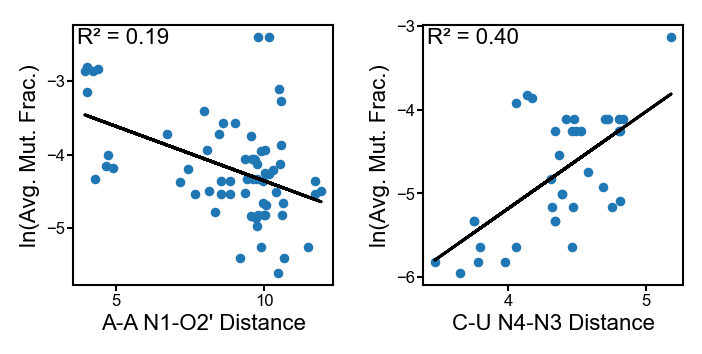

In [4]:
fig_size = (7, 2)
layout = (1, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.40, "right": 0.0, "top": 0.0, "bottom": 0.50},
}

coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
fig = plt.figure(figsize=fig_size, dpi=200)
dfs = [
    df_dist.query('pair == "A-A" and atom1 == "N1" and atom2 == "O2\'"'),
    df_dist.query('pair == "C-U" and atom1 == "N4" and atom2 == "N3"'),
]
labels = ["A-A N1-O2'", "C-U N4-N3"]
for i, df in enumerate(dfs):
    ax = fig.add_axes(coords_list[i])
    scatter_plot_w_regression(
        df, ax, "distance", "ln_r_data_mean", r2_position=(0.37, 0.99)
    )
    ax.set_ylabel("ln(Avg. Mut. Frac.)", labelpad=2)
    ax.set_xlabel(labels[i] + " Distance", labelpad=2)
    publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s16.png",
    dpi=600,
    bbox_inches="tight",
)